# Лабораторная работа № 1 по прикладному программированию на python. Вариант № 2.

# Задание

С использованием сервиса gismeteo получите данные о погоде в Самаре за максимально возможный период. Данные необходимо сохранить в выходном файле dataset.csv, где каждой строке будет соответсвовать отдельный день, а в строке через запятую будут указаны дата, температура, давление, данные о ветре.

In [ ]:
from bs4 import BeautifulSoup
import csv
import os
import requests


def parser(year_from, year_to, step=1):
    parser_data = []
    for year in range(year_from, year_to + 1, step):
        for month in range(1, 13):
            URL = f"https://www.gismeteo.ru/diary/4618/{year}/{month}/"
            html_page = requests.get(
                URL, headers={"User-Agent": "Mozilla/5.0"})
            soup = BeautifulSoup(html_page.text, 'lxml')
            for day in soup.find_all('td', class_="first"):
                try:
                    temp = day.find_next()
                    press = temp.find_next()
                    wind = press.find_next_sibling().find_next_sibling().find_next_sibling()
                    parser_data.append([day.text + "." + str(month).zfill(2) + "." + str(year),
                                        temp.text + "°C", press.text + "мм.рт.ст.", wind.text])
                except:
                    print("Parsing error for " + day.text + "." + str(month).zfill(2) + "." + str(year))
    return parser_data


def upload_csv(parser_data):
    with open('dataset.csv', 'w', encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(parser_data)


upload_csv(parser(2008, 2023))

print("Загрузка завершена")


Parsing error for 13.09.2015
Parsing error for 5.01.2016
Parsing error for 10.01.2016
Parsing error for 24.04.2016
Parsing error for 1.06.2016
Parsing error for 13.12.2017
Parsing error for 25.04.2018
Parsing error for 29.07.2019
Parsing error for 8.08.2021
Загрузка завершена


# Пояснение

Ошибки "Parsing error" связаны с тем, что на сайте за этот день отсутствуют данные метеорологических наблюдений.

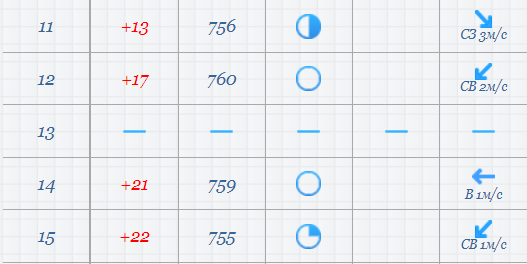

# Получение 30-строк из выходного файла dataset.csv


In [6]:
import csv

n = 0
with open("dataset.csv", "r") as f:
    for line in csv.reader(f):
      if n == 30:
        break
      n += 1
      print(line)


['10.01.2008', '-20°C', '765мм.рт.ст.', 'В 2м/с']
['11.01.2008', '-20°C', '764мм.рт.ст.', 'Ш']
['12.01.2008', '-20°C', '762мм.рт.ст.', 'З 2м/с']
['13.01.2008', '-9°C', '756мм.рт.ст.', 'ЮЗ 3м/с']
['14.01.2008', '-6°C', '751мм.рт.ст.', 'ЮЗ 2м/с']
['15.01.2008', '-1°C', '753мм.рт.ст.', 'З 1м/с']
['16.01.2008', '-1°C', '759мм.рт.ст.', 'Ш']
['17.01.2008', '-4°C', '765мм.рт.ст.', 'Ю 3м/с']
['18.01.2008', '-8°C', '765мм.рт.ст.', 'Ю 1м/с']
['19.01.2008', '-9°C', '765мм.рт.ст.', 'Ш']
['20.01.2008', '-9°C', '762мм.рт.ст.', 'Ю 3м/с']
['21.01.2008', '-15°C', '759мм.рт.ст.', 'В 2м/с']
['22.01.2008', '-13°C', '753мм.рт.ст.', 'В 4м/с']
['23.01.2008', '-9°C', '751мм.рт.ст.', 'Ю 3м/с']
['24.01.2008', '-11°C', '750мм.рт.ст.', 'В 3м/с']
['25.01.2008', '-8°C', '753мм.рт.ст.', 'В 1м/с']
['26.01.2008', '-4°C', '742мм.рт.ст.', 'Ю 2м/с']
['27.01.2008', '-1°C', '735мм.рт.ст.', 'В 2м/с']
['28.01.2008', '-1°C', '741мм.рт.ст.', 'ЮВ 3м/с']
['29.01.2008', '-4°C', '749мм.рт.ст.', 'Ю 1м/с']
['30.01.2008', '-6°C', '75